<a href="https://colab.research.google.com/github/khaerunnissa/Python/blob/master/Customer_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Context
This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

# Content
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

#Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

Data yang digunakan dapat diakses melalui : https://drive.google.com/file/d/1AUn-h6OEVhUhoOh7JdxKkdX6wF7w5hod/view?usp=sharing

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading and understanding Data

In [3]:
raw_data = pd.read_csv('/content/drive/MyDrive/data_latihan/Mall_Customers.csv')
raw_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data = raw_data.set_index(['CustomerID'])

In [5]:
mapping = { "Gender" : {"Male":0, "Female":1}}
data.replace(mapping, inplace=True)

In [6]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


In [7]:
data.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [8]:
data.nunique()

Gender                     2
Age                       51
Annual Income (k$)        64
Spending Score (1-100)    84
dtype: int64

### This provides us the number of unique values present in our data

In [9]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### This shows we have no null values in our data hence can now move forward with plotting

# Pair plotting of data

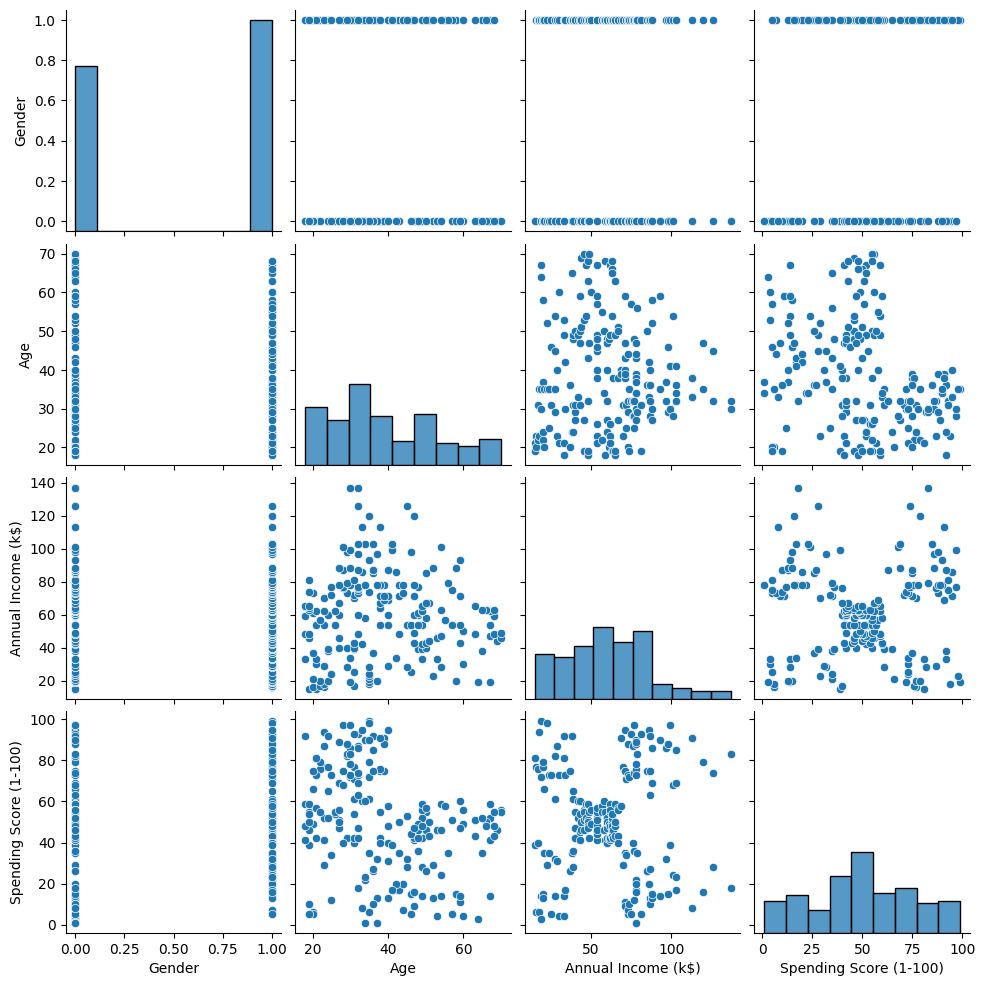

In [10]:
sns.pairplot(data)

# Correlation Matrix

In [11]:
data.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.058109,-0.327227,0.009903,1.000000


### Correlation Matrix using Matplotlib

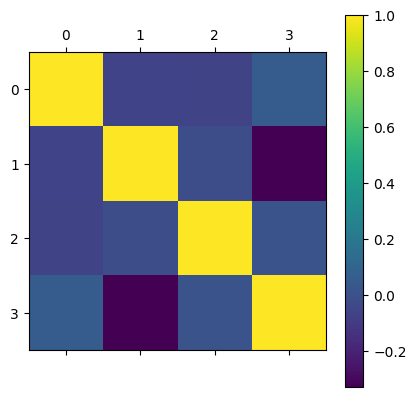

In [12]:
plt.matshow(data.corr())
plt.colorbar()

### Correlation matrix using SNS

<Axes: >

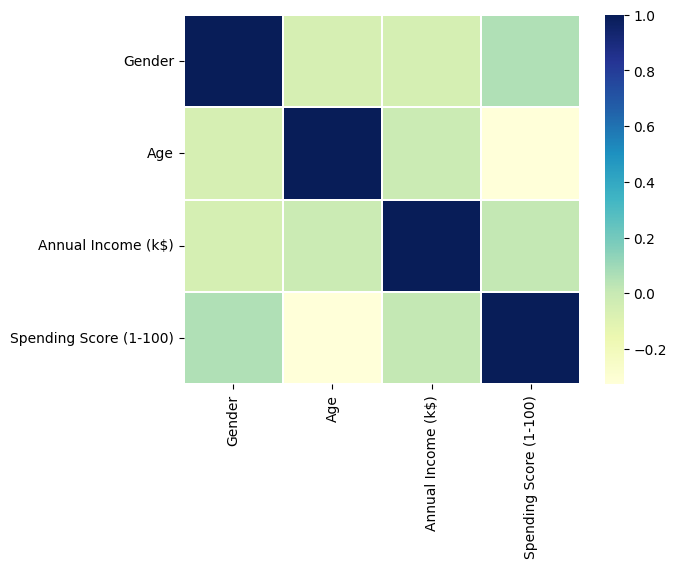

In [13]:
corr = data.corr()
sns.heatmap(corr, cmap='YlGnBu', linewidths='0.1')

In [14]:
corr.style.background_gradient(cmap='coolwarm')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.058109,-0.327227,0.009903,1.000000


### By looking at Correlation matrix we can see that Age and Spending score are more linearly correlated than any other feature and Annual Income and Spending score are not at all linearly correlated

# Building Elbow method graph for identifying number of clusters

In [15]:
## Building The Elbow Method Graph with full data

wcss = []
for i in range(2,10):
    kmeans = KMeans(i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
wcss

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[212889.44245524303,
 143391.59236035676,
 104422.83498539751,
 75399.61541401484,
 58348.641363315044,
 51132.703212576904,
 44357.6215098352,
 40629.17900056467]

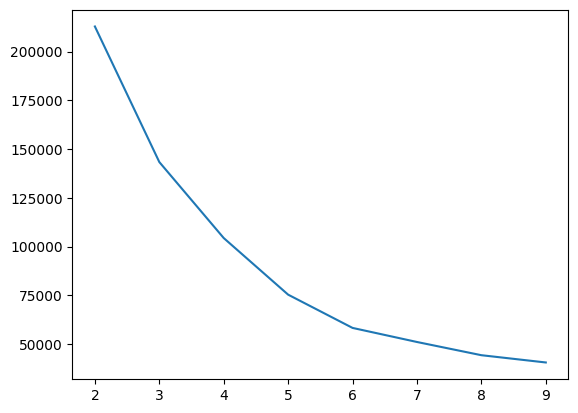

In [16]:
plt.plot(range(2,10), wcss)
# titik landai disebut elbow / jumlah clustering optimal
# kekurangan elbow tidak bisa merepresantikan melalui chart, sehingga suit untuk mengetahui jumlah cluster optimal hanya dari chart

## Silhouette Score for identifying number of clusters

In [17]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil = []
# Number of clusters in range 2-20
K = range(2, 10)
for n in K:
    algorithm = (KMeans(n_clusters = n) )
    algorithm.fit(data)
    labels = algorithm.labels_
    sil.append(silhouette_score(data, labels, metric = 'euclidean'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [18]:
sil
# angka optimum yaitu yang mendekati angka 1
# siluet skor untuk melihat nilai elbow atau jumlah cluster optimum
# nilai yang mendekati 1 yaitu 0.45205475380756527 >> urutan ke 6 >> elbow atau jml cluster optimal yaitu 6

[0.29307334005502633,
 0.383798873822341,
 0.4052954330641215,
 0.4440669204743008,
 0.45205475380756527,
 0.44096462877395787,
 0.4222442470436427,
 0.3884448555855653]

In [19]:
# jumlah cluster 6
kmeans = KMeans(6)
kmeans.fit(data)
clusters = data.copy()
clusters['prediction'] = kmeans.fit_predict(data)
clusters[:15]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Gender,Age,Annual Income (k$),Spending Score (1-100),prediction
CustomerID,,,,,
1,0,19,15,39,2
2,0,21,15,81,3
3,1,20,16,6,2
4,1,23,16,77,3
5,1,31,17,40,2
6,1,22,17,76,3
7,1,35,18,6,2
8,1,23,18,94,3
9,0,64,19,3,2


Text(0.5, 0, 'Spending Score (1-100)')

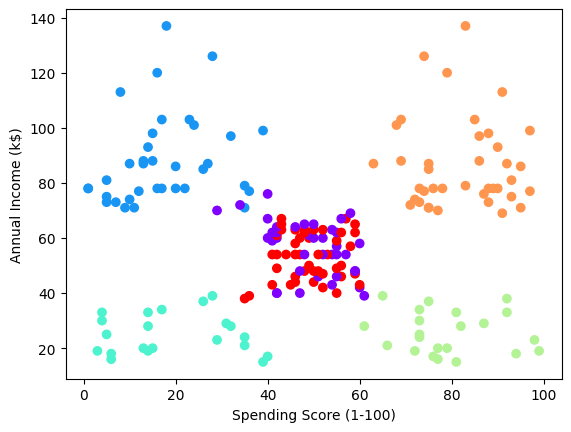

In [20]:
plt.scatter(data['Spending Score (1-100)'],data['Annual Income (k$)'], c= clusters['prediction'], cmap='rainbow')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')
# cluster 6 namun ada data yang menimpa,

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 0, 'Spending Score (1-100)')

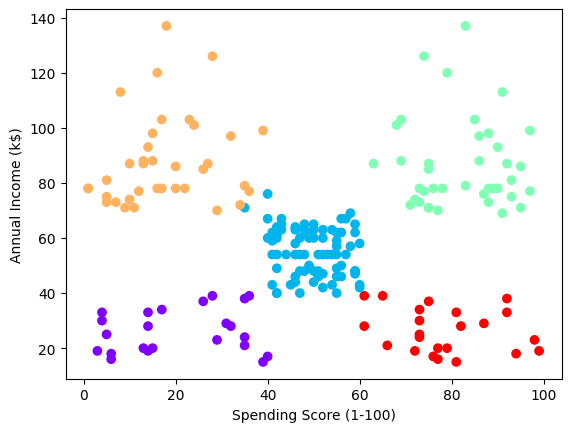

In [21]:
# cluster diperkecil dan diubah jadi 5
kmeans = KMeans(5)
kmeans.fit(data)
clusters = data.copy()
clusters['prediction'] = kmeans.fit_predict(data)
plt.scatter(data['Spending Score (1-100)'],data['Annual Income (k$)'], c= clusters['prediction'], cmap='rainbow')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')

In [22]:
clusters.groupby('prediction').mean()

# Berdasarkan nilai prediction, kelompok pada cluster 4 memiliki nilai spending score paling besar. Artinya memiliki potensi yang besar untuk membeli produk

,Gender,Age,Annual Income (k$),Spending Score (1-100)
prediction,,,,
0,0.608696,45.217391,26.304348,20.913043
1,0.582278,43.088608,55.291139,49.569620
2,0.538462,32.692308,86.538462,82.128205
3,0.472222,40.666667,87.750000,17.583333
4,0.608696,25.521739,26.304348,78.565217


### This divided the middle cluster into further parts which is not required so K=5 looks like the best option hence we'll stop here as k=5 is the best approach